# Basics of deep learning and neural networks


## Forward Prop

In [0]:
import numpy as np

In [0]:
input_data= np.array([3, 5])
weights= {'node_0': np.array([2, 4]), 
          'node_1': np.array([ 4, -5]),
          'output': np.array([2, 7])}

In [0]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data*weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data*weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs*weights['output']).sum()

# Print output
print(output)

-39


## relu

In [0]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


## multiple data point

Define a function called predict_with_network() which will generate predictions for multiple data observations

In [0]:
input_data=[np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights={'node_0': np.array([2, 4]), 
         'node_1': np.array([ 4, -5]), 
         'output': np.array([2, 7])}

In [0]:
# Define predict_with_network()
def predict_with_network1(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)                                  ##I thought we are not supposed to use relu in the final layer!?
    
    # Return model output
    return (model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network1(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


**DL**
- DL is also called Representation learning cause it forms sophisticated representation of data, untill we can make predictions on them (e.g on images)
- DL partially replaced feature engineering

## 2 layers

In this exercise, you'll write code to do forward propagation for a neural network with **2 hidden layers**. Each hidden layer has two nodes. The input data has been preloaded as input_data. The nodes in the first hidden layer are called node_0_0 and node_0_1. Their weights are pre-loaded as weights['node_0_0'] and weights['node_0_1'] respectively.

The nodes in the second hidden layer are called node_1_0 and node_1_1. Their weights are pre-loaded as weights['node_1_0'] and weights['node_1_1'] respectively.

We then create a model output from the hidden nodes using weights pre-loaded as weights['output']

In [0]:
weights = {'node_0_0': np.array([2, 4]),
            'node_0_1': np.array([ 4, -5]),
            'node_1_0': np.array([-1,  2]),
            'node_1_1': np.array([1, 2]),
            'output': np.array([2, 7])}
input_data= np.array([3, 5])

In [0]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    #Do not apply the relu() function to this output.
    #Ekhon boltese :|
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


**The last layers capture the most complex interactions.**

# Optimizing a neural network with backward propagation

**Loss function** aggregates all the loss of each data point.

**Gradient Descent**:
1. start at a random point
2. Untill you are somewhere flat(all other directions are uphill):
  - find the slope
  - take a step downhill

## Manually change a weight to get perfect loss

In [0]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network1(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network1(input_data,weights_1)

# Calculate error: error_1
error_1 = target_actual - model_output_1

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


## multiple data points

In [0]:
target_actuals = [1, 3, 5, 7]

weights_0={'node_0': np.array([2, 1]), 
           'node_1': np.array([1, 2]), 
           'output': np.array([1, 1])}

weights_1={'node_0': np.array([2, 1]),
            'node_1': np.array([1. , 1.5]),
            'output': np.array([1. , 1.5])}

input_data=[np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

In [0]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network1(row,weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network1(row,weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals,model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals,model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


## slope
- slope = slope of loss func wrt the value of the node we feed into (output node) * value of the node we feed into our weight (node before the output node) * slope of act func wrt output node
- w_new = w - lr*(slope)

When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (y-xb), or 2 * input_data * error. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what you want.

In [0]:
target=0
weights=np.array([0, 2, 1])
input_data=np.array([1, 2, 3])

In [0]:
# Calculate the predictions: preds
preds = (input_data*weights).sum()

# Calculate the error: error
error = target - preds

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[-14 -28 -42]


In [0]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate*slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


In [0]:
def get_slope(input_data, target, weights):
  preds = (weights * input_data).sum()
  error = preds - target
  slope = 2 * input_data * error
  return slope

def get_mse(input_data, target, weights):
  preds = (weights * input_data).sum()
  return (preds-target)**2

In [0]:
import matplotlib.pyplot as plt

In [0]:
target=0
weights=np.array([0, 2, 1])
input_data=np.array([1, 2, 3])

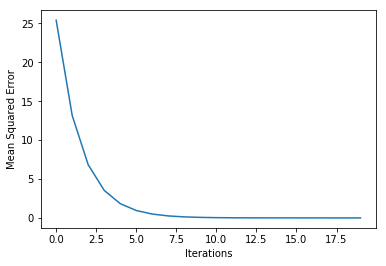

In [0]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Back prop

Gradient for weight is product of:
- node value feeding into that weight
- slope of loss func wrt node it feeds into
- slope of activation function at the mode it feeds into

# Building deep learning models with keras


 For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target

In [0]:
import pandas as pd

## Data

In [0]:
hr = 'https://assets.datacamp.com/production/repositories/654/datasets/8a57adcdb5bfb3e603dad7d3c61682dfe63082b8/hourly_wages.csv'
hr = pd.read_csv(hr)
hr.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [0]:
mnist = 'https://assets.datacamp.com/production/repositories/654/datasets/24769dae9dc51a77b9baa785d42ea42e3f8f7538/mnist.csv'
mnist = pd.read_csv(mnist,header=None)
mnist.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.58,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.59,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.6,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617
1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [0]:
titanic = 'https://assets.datacamp.com/production/repositories/654/datasets/92b75b9bc0c0a8a30999d76f4a1ee786ef072a9c/titanic_all_numeric.csv'
titanic = pd.read_csv(titanic)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


## Model

### Regression

In [0]:
y = hr.loc[:,'wage_per_hour'].values
X = hr.iloc[:,1:].values
y.shape, X.shape, hr.shape

((534,), (534, 9), (534, 10))

- Scalinf before fitting can ease optimization

In [0]:

# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = X.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X,y,epochs=10)

Epoch 1/10
534/534 [==============================] - 0s 683us/step - loss: 281.8101
Epoch 2/10
534/534 [==============================] - 0s 71us/step - loss: 41.5805
Epoch 3/10
534/534 [==============================] - 0s 75us/step - loss: 25.5466
Epoch 4/10
534/534 [==============================] - 0s 58us/step - loss: 23.7893
Epoch 5/10
534/534 [==============================] - 0s 50us/step - loss: 23.1255
Epoch 6/10
534/534 [==============================] - 0s 50us/step - loss: 22.8580
Epoch 7/10
534/534 [==============================] - 0s 51us/step - loss: 22.5708
Epoch 8/10
534/534 [==============================] - 0s 55us/step - loss: 22.3361
Epoch 9/10
534/534 [==============================] - 0s 52us/step - loss: 22.1579
Epoch 10/10
534/534 [==============================] - 0s 52us/step - loss: 22.1677


In [0]:
?model.fit

### Classification

In [0]:
predictors = titanic.drop('survived',axis=1).values

In [0]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(titanic.survived)
n_cols = predictors.shape[1]
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors,target,epochs=10)

Epoch 1/10
891/891 [==============================] - 0s 398us/step - loss: 3.3883 - acc: 0.5825
Epoch 2/10
891/891 [==============================] - 0s 52us/step - loss: 1.6857 - acc: 0.6094
Epoch 3/10
891/891 [==============================] - 0s 52us/step - loss: 0.9922 - acc: 0.6162
Epoch 4/10
891/891 [==============================] - 0s 49us/step - loss: 0.6593 - acc: 0.6700
Epoch 5/10
891/891 [==============================] - 0s 49us/step - loss: 0.6097 - acc: 0.6824
Epoch 6/10
891/891 [==============================] - 0s 49us/step - loss: 0.6313 - acc: 0.6790
Epoch 7/10
891/891 [==============================] - 0s 44us/step - loss: 0.6107 - acc: 0.6801
Epoch 8/10
891/891 [==============================] - 0s 47us/step - loss: 0.6045 - acc: 0.7003
Epoch 9/10
891/891 [==============================] - 0s 51us/step - loss: 0.5890 - acc: 0.6958
Epoch 10/10
891/891 [==============================] - 0s 59us/step - loss: 0.5837 - acc: 0.6880


In [0]:
from keras.models import load_model
model.save('model.h5')
new_model=load_model('model.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 66        
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Calculate predictions: predictions
predictions = model.predict(predictors)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]>=0.8

In [0]:
# Calculate predictions: predictions
predictions = new_model.predict(predictors)

# Calculate predicted probability of survival: predicted_prob_true
new_predicted_prob_true = predictions[:,1]>=0.8

(new_predicted_prob_true!=predicted_prob_true).sum()

0

# Fine-tuning keras models


- test various learning rates with a simpler optimizer such as sgd
- there may be dying neuron problem, where if a node starts getting negative input, in case of relu, its slope will also be zero, and it wont get updated, and will remain zero. Thus contributing nothing to the model.
- vanishing gradient problem: when the slope is too small, overtime  the updates are close to zero. eg. the higher and lower values of a tanh activation have very flat slope.

In [0]:
def get_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
  model.add(Dense(2, activation='softmax'))
  return model

In [0]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001,0.01,1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Fit the model
    model.fit(predictors,target,epochs=5)



Testing model with learning rate: 0.000001

Epoch 1/5
891/891 [==============================] - 1s 740us/step - loss: 2.1493 - acc: 0.6734
Epoch 2/5
891/891 [==============================] - 0s 51us/step - loss: 2.1458 - acc: 0.6734
Epoch 3/5
891/891 [==============================] - 0s 45us/step - loss: 2.1423 - acc: 0.6734
Epoch 4/5
891/891 [==============================] - 0s 48us/step - loss: 2.1388 - acc: 0.6734
Epoch 5/5
891/891 [==============================] - 0s 43us/step - loss: 2.1353 - acc: 0.6734


Testing model with learning rate: 0.010000

Epoch 1/5
891/891 [==============================] - 1s 792us/step - loss: 2.6673 - acc: 0.5825
Epoch 2/5
891/891 [==============================] - 0s 49us/step - loss: 1.2339 - acc: 0.6274
Epoch 3/5
891/891 [==============================] - 0s 48us/step - loss: 1.0191 - acc: 0.6195
Epoch 4/5
891/891 [==============================] - 0s 51us/step - loss: 0.7599 - acc: 0.6431
Epoch 5/5
891/891 [==============================] 

## model validation

- deep learning is typically used on large datasets
- so usually we use validation split, instead of k-fold cross validation because:
  - the validation data is large enough, so we can trust this score
  - cross-valdation is expensive
- include, validation_split=0.3 in .fit method
- we introduce early stopping, with a parameter patience. It means how many epochs the model can go without improving.2/3 is good. Add it in a list to .fit under the parameter callbacks.

### validation split

In [0]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors,target,validation_split=0.3,epochs=10)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 1s 2ms/step - loss: 1.0845 - acc: 0.5939 - val_loss: 0.6530 - val_acc: 0.7201
Epoch 2/10
623/623 [==============================] - 0s 92us/step - loss: 0.6389 - acc: 0.6677 - val_loss: 0.5226 - val_acc: 0.7313
Epoch 3/10
623/623 [==============================] - 0s 75us/step - loss: 0.5956 - acc: 0.6661 - val_loss: 0.5696 - val_acc: 0.7201
Epoch 4/10
623/623 [==============================] - 0s 69us/step - loss: 0.5875 - acc: 0.6950 - val_loss: 0.5105 - val_acc: 0.7239
Epoch 5/10
623/623 [==============================] - 0s 77us/step - loss: 0.6037 - acc: 0.6790 - val_loss: 0.5382 - val_acc: 0.7425
Epoch 6/10
623/623 [==============================] - 0s 71us/step - loss: 0.6306 - acc: 0.6902 - val_loss: 0.5553 - val_acc: 0.7500
Epoch 7/10
623/623 [==============================] - 0s 74us/step - loss: 0.5684 - acc: 0.7063 - val_loss: 0.4874 - val_acc: 0.7724
Epoch 8/10
623/623 [====

In [0]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
hist = model.fit(predictors,target,validation_split=0.3,epochs=30,callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 1s 2ms/step - loss: 0.8031 - acc: 0.6437 - val_loss: 0.5770 - val_acc: 0.7164
Epoch 2/30
623/623 [==============================] - 0s 76us/step - loss: 0.7432 - acc: 0.6340 - val_loss: 0.6288 - val_acc: 0.6903
Epoch 3/30
623/623 [==============================] - 0s 74us/step - loss: 0.6971 - acc: 0.6388 - val_loss: 0.5758 - val_acc: 0.7052
Epoch 4/30
623/623 [==============================] - 0s 75us/step - loss: 0.6182 - acc: 0.6709 - val_loss: 0.5436 - val_acc: 0.7761
Epoch 5/30
623/623 [==============================] - 0s 79us/step - loss: 0.5964 - acc: 0.7127 - val_loss: 0.4970 - val_acc: 0.7836
Epoch 6/30
623/623 [==============================] - 0s 78us/step - loss: 0.5723 - acc: 0.7063 - val_loss: 0.5235 - val_acc: 0.7201
Epoch 7/30
623/623 [==============================] - 0s 86us/step - loss: 0.6197 - acc: 0.6966 - val_loss: 0.6285 - val_acc: 0.7239


**Stopped on just 7 epochs**

## testing various node number

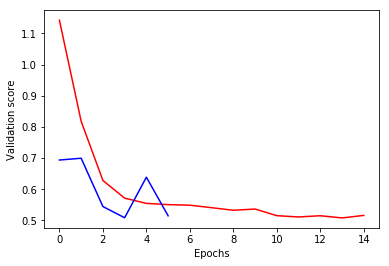

In [0]:
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape = input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()
model_2.add(Dense(100, activation='relu', input_shape = input_shape))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(2, activation='softmax'))
# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

## test with various number of layers

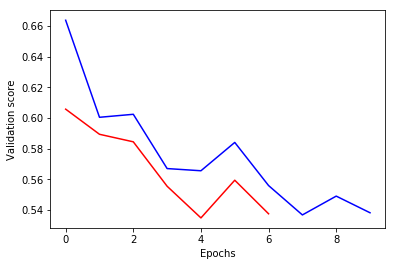

In [0]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

##model-1
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape = input_shape))
model_1.add(Dense(2, activation='softmax'))
# Compile model_2
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create the new model: model_2
model_2 = Sequential()
model_2.add(Dense(50, activation='relu', input_shape = input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(2, activation='softmax'))
# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


**Deciding what models to try**
- is still an art
- but we should take into consideration the model capacity

**General Rule**
- start with a simple model
- if score gets better keep incresing capacity(node/layer or #of layers)
- else reduce capacity

**Howards method**
- build an unnecessarily large model
- if it overfits, keep adding regularization and dropouts

https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws

## Image classification

In [0]:
mnist.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.58,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.59,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.6,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617
1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [0]:
mnist.shape

(2001, 785)

In [0]:
np.sqrt(784)

28.0

In [0]:
mnist.iloc[0,1:].shape

(784,)

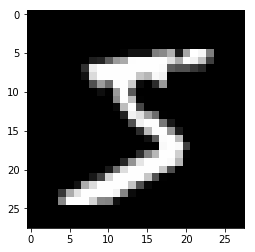

In [0]:
import matplotlib.pyplot as plt

plt.imshow(mnist.iloc[0,1:].values.reshape(28,28),cmap='gray');

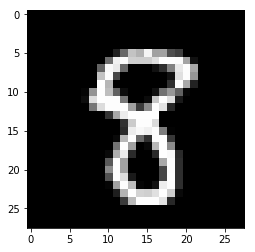

In [0]:
plt.imshow(mnist.iloc[100,1:].values.reshape(28,28),cmap='gray');

In [0]:
X = mnist.iloc[:,1:]
y = mnist.iloc[:,0]
y.shape, X.shape

((2001,), (2001, 784))

In [0]:
## keras needs one-hot-encoding
y = to_categorical(y)
y.shape

(2001, 10)

In [0]:
model= Sequential()
model.add(Dense(50, activation='relu', input_shape = (784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X, y, validation_split=0.3,epochs=15)

Train on 1400 samples, validate on 601 samples
Epoch 1/15
1400/1400 [==============================] - 2s 2ms/step - loss: 11.1666 - acc: 0.2779 - val_loss: 9.4001 - val_acc: 0.3877
Epoch 2/15
1400/1400 [==============================] - 0s 109us/step - loss: 9.0970 - acc: 0.4143 - val_loss: 8.6738 - val_acc: 0.4443
Epoch 3/15
1400/1400 [==============================] - 0s 111us/step - loss: 7.6737 - acc: 0.5029 - val_loss: 7.6826 - val_acc: 0.4942
Epoch 4/15
1400/1400 [==============================] - 0s 116us/step - loss: 6.7832 - acc: 0.5564 - val_loss: 6.9125 - val_acc: 0.5541
Epoch 5/15
1400/1400 [==============================] - 0s 112us/step - loss: 6.1114 - acc: 0.6057 - val_loss: 6.3175 - val_acc: 0.5824
Epoch 6/15
1400/1400 [==============================] - 0s 117us/step - loss: 5.6638 - acc: 0.6336 - val_loss: 6.3073 - val_acc: 0.5890
Epoch 7/15
1400/1400 [==============================] - 0s 112us/step - loss: 5.7971 - acc: 0.6279 - val_loss: 5.8366 - val_acc: 0.6206
Ep

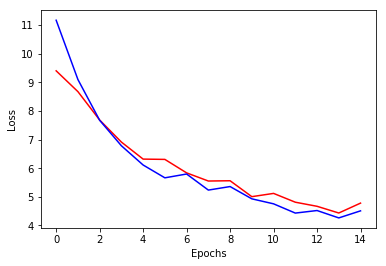

In [0]:
plt.plot(hist.history['val_loss'], 'r',hist.history['loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

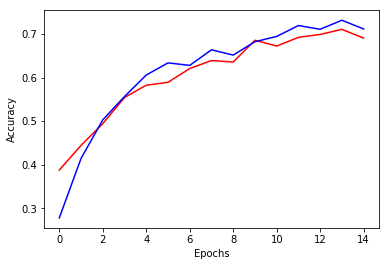

In [0]:
plt.plot(hist.history['val_acc'], 'r',hist.history['acc'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()